In [1]:
from models import *
from static import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

### Simulate One Model

In [2]:
steps = 50
model = abmodel(static_map_v0(), all_agents())
model.run_model(steps)
model_results = model.datacollector.get_model_vars_dataframe()
model_results.head()

C:\Users\user\anaconda3\Lib\site-packages\mesa\time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)
D:\Study Source\KCL\Agent Based Modelling\ABM_FX\resources.py:11: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(agent_id, model)
D:\Study Source\KCL\Agent Based Modelling\ABM_FX\corporates.py:153: RuntimeWarning: divide by zero encountered in scalar power
  target_currencyA = ((self.cost_currencyB/self.cost_currencyA)*(target_utility**(-cost_total/self.cost_currencyB)))**(-1/(1+(self.cost_currencyA/self.cost_currencyB)))
D:\Study Source\KCL\Agent Base

Step  (Corporate V0)  Trade Volume (Corporate V0)  Price (Corporate V0)  \
0     1             300                           21              0.949163   
1     2             300                            9              0.944052   
2     3             300                            8              0.995367   
3     4             300                           21              1.182322   
4     5             300                            2              0.800065   

   (Central Bank V0)                                interest_rate  \
0                  2   (0.01022906828509102, 0.00935661636241869)   
1                  2  (0.01522906828509102, 0.014356616362418691)   
2                  2   (0.02022906828509102, 0.01935661636241869)   
3                  2  (0.02022906828509102, 0.021856616362418688)   
4                  2  (0.02022906828509102, 0.021856616362418688)   

                                inflation_rate  (Local Bank)  \
0  (0.045575444919462145, 0.05893040134853313)             8   
1  (0.04234404962907451, 0.049873301008941134)             8   
2   (0.03733281954434194, 0.04485648935469544)             8   
3   (0.031117181305068735, 0.0389000150868158)             8   
4  (0.031473678695094084, 0.03471368197722266)             8   

   Trade Volume (Local Bank)  Price (Local Bank)  Hedge Volume (Local Bank)  \
0                         20            0.967043                         49   
1                          9            0.944052                         77   
2                          8            0.995367                          9   
3                         21            1.182322                         21   
4                          1            0.828400                          3   

   Hedge Price (Local Bank)  (International Bank)  \
0                  0.968493                     8   
1                  0.810931                     8   
2                  0.746429                     8   
3                  0.826452                     8   
4                  0.929682                     8   

   Trade Volume (International Bank)  Price (International Bank)  \
0                                 20                    0.967043   
1                                  9                    0.944052   
2                                  8                    0.995367   
3                                 21                    1.182322   
4                                  1                    0.828400   

   Hedge Volume (International Bank)  Hedge Price (International Bank)  
0                                 49                          0.968493  
1                                 77                          0.810931  
2                                  9                          0.746429  
3                                 21                          0.826452  
4                                  3                          0.929682

### Corporate Details

In [3]:
model.corporate_details.by_agent(model.corporate_details.all_ids()[0]).head()

Step  Position  Currency A  Currency B  \
0     0  (29, 23)          39          44   
1     1  (29, 23)          37          40   
2     2  (29, 22)          36          37   
3     3  (28, 22)          36          34   
4     4  (28, 21)          37          31   

                                Quotes Traded Price Traded Amount Traded with  
0                   (None, None, None)           []            []          []  
1   (short, 1.0302, 11.22037844996489)           []            []          []  
2    (short, 0.9791, 11.7485365250667)           []            []          []  
3  (short, 0.9057, 13.077811466895433)           []            []          []  
4  (short, 0.8198, 15.249077922563508)           []            []          []

### Bank Details

In [4]:
model.bank_details.all_ids()

[5302, 5303, 5304, 5305, 5306, 5307, 5308, 5309]

In [5]:
model.bank_details.by_agent(model.bank_details.all_ids()[0]).head()

Step  Position  Currency A  Currency B      Traded Price  \
0     0  (10, 10)  314.000000  183.000000                []   
1     1  (10, 10)  273.971830  203.369650          [0.6949]   
2     2  (10, 10)  252.047096  230.799131          [1.9161]   
3     3  (10, 10)  269.881591  249.392938  [0.2954, 2.2061]   
4     4  (10, 10)  264.881591  244.392938                []   

                              Traded Amount   Traded with  Hedged Price  \
0                                        []            []            []   
1                      [-6.288170455776246]        [5189]  [0.74, 0.74]   
2                      [-16.92473340931742]        [5180]            []   
3  [38.71303015239979, -15.878534812325185]  [5026, 5077]            []   
4                                        []            []            []   

    Hedged Amount   Hedged with  
0              []            []  
1  [-1.35, -1.35]  [5310, 5310]  
2              []            []  
3              []            []  
4              []            []

In [6]:
model.bank_details.by_step(steps)

Agent ID  Position  Currency A  Currency B      Traded Price  \
0      5302  (10, 10)  143.318595   54.250497                []   
1      5303  (20, 10)  493.612196   75.787224                []   
2      5304  (30, 10)  385.521969  112.238292  [0.4318, 0.4125]   
3      5305  (40, 10)  409.036302  117.402774          [1.4627]   
4      5306  (10, 40)    8.436550  272.220637                []   
5      5308  (30, 40)   25.091264  527.237522                []   
6      5309  (40, 40)   11.637954  249.614538                []   

                               Traded Amount   Traded with  \
0                                         []            []   
1                                         []            []   
2  [-6.9644606431358085, -6.256797815256128]  [5262, 5116]   
3                      [-22.163990631826444]        [5149]   
4                                         []            []   
5                                         []            []   
6                                         []            []   

                                        Hedged Price  \
0                                                 []   
1                                                 []   
2  [0.37, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.4...   
3                                             [0.44]   
4                                            [20.12]   
5                                                 []   
6                                                 []   

                                       Hedged Amount  \
0                                                 []   
1                                                 []   
2  [2.67, -2.28, -2.27, -2.27, -2.27, -2.27, -2.2...   
3                                             [2.29]   
4                                               [-1]   
5                                                 []   
6                                                 []   

                                         Hedged with  
0                                                 []  
1                                                 []  
2  [5302, 5305, 5305, 5305, 5305, 5305, 5305, 530...  
3                                             [5304]  
4                                             [5308]  
5                                                 []  
6                                                 []

In [7]:
model.international_bank_details.all_ids()

[5310, 5311]

In [8]:
model.international_bank_details.by_step(steps)

Agent ID  Position   Currency A   Currency B Traded Price Traded Amount  \
0      5310  (25, 15)  1375.391205   163.312596           []            []   
1      5311  (25, 35)  1102.900569  1308.707079           []            []   

  Traded with Hedged Price Hedged Amount Hedged with  
0          []           []            []          []  
1          []           []            []          []

### Interbank Limit Order Book

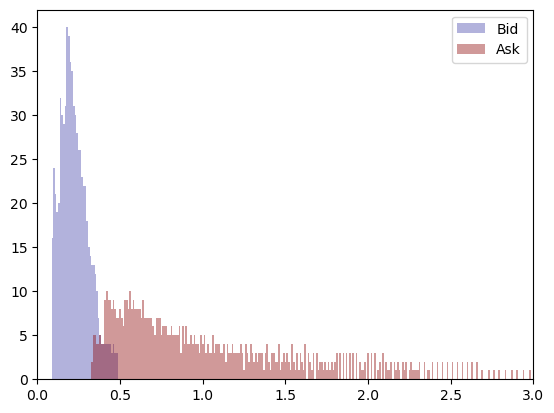

In [9]:
model.bank_details.lob(steps)

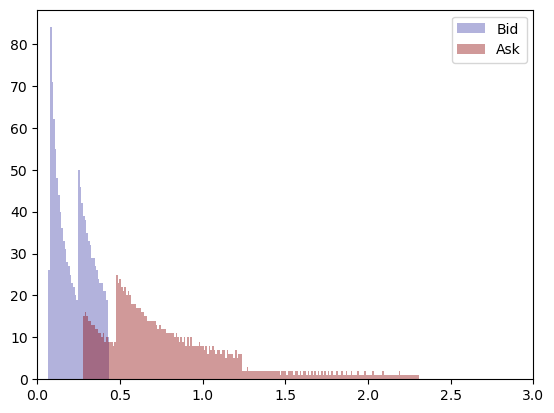

In [10]:
model.international_bank_details.lob(steps)

### Positions of Agents

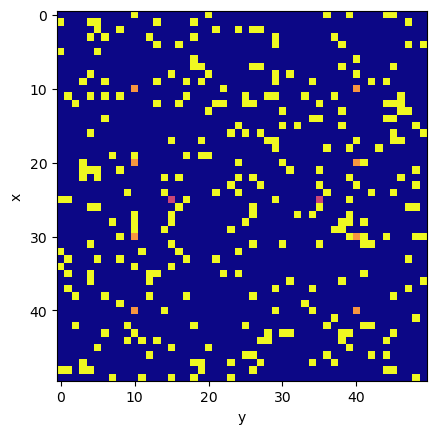

In [11]:
step = 0
final_pos_corps = model.corporate_details.agent_pos[step]
final_pos_banks = model.bank_details.agent_pos[step]
final_pos_int_banks = model.international_bank_details.agent_pos[step]
final_grid = [[0]*50 for i in range(50)]
for pos in final_pos_corps:
    (x,y) = pos
    final_grid[x][y] = 1
for pos in final_pos_banks:
    (x,y) = pos
    final_grid[x][y] = 0.75
for pos in final_pos_int_banks:
    (x,y) = pos
    final_grid[x][y] = 0.5
plt.imshow(final_grid, cmap='plasma')
plt.ylabel('x')
plt.xlabel('y')
plt.show()

### 3D Map of Resources

In [12]:
currencyA_3d = np.array([[a.pos[0], a.pos[1], a.amount] for a in model.schedule.agents_by_type[currencyA_basic].values()])
currencyB_3d = np.array([[a.pos[0], a.pos[1], a.amount] for a in model.schedule.agents_by_type[currencyB_basic].values()])

C:\Users\user\AppData\Local\Temp\ipykernel_15508\318248497.py:1: DeprecationWarning: Because of the shift to using AgentSet, in the future this attribute will return a dict withtype as key as AgentSet as value. Future behavior is available via RandomActivationByType._agents_by_type
  currencyA_3d = np.array([[a.pos[0], a.pos[1], a.amount] for a in model.schedule.agents_by_type[currencyA_basic].values()])
C:\Users\user\AppData\Local\Temp\ipykernel_15508\318248497.py:2: DeprecationWarning: Because of the shift to using AgentSet, in the future this attribute will return a dict withtype as key as AgentSet as value. Future behavior is available via RandomActivationByType._agents_by_type
  currencyB_3d = np.array([[a.pos[0], a.pos[1], a.amount] for a in model.schedule.agents_by_type[currencyB_basic].values()])


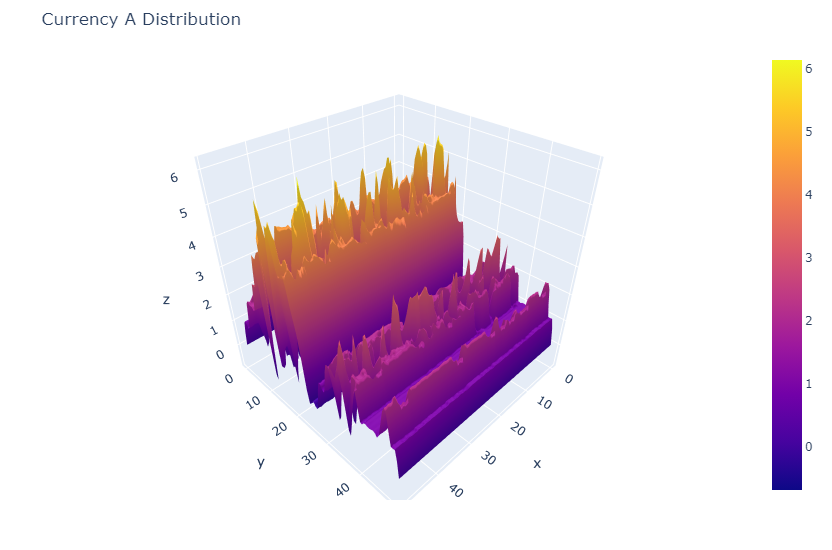

In [13]:
%matplotlib inline
import plotly.graph_objects as go
from scipy.interpolate import griddata
x = currencyA_3d[:,0]
y = currencyA_3d[:,1]
z = currencyA_3d[:,2]
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)

X,Y = np.meshgrid(xi,yi)

Z = griddata((x,y),z,(X,Y), method='cubic')

fig = go.Figure(go.Surface(x=xi,y=yi,z=Z))

fig.update_layout(title='Currency A Distribution', autosize=False,
                  width=500, height=550,
                  margin=dict(l=50, r=50, b=50, t=50))

fig.show()

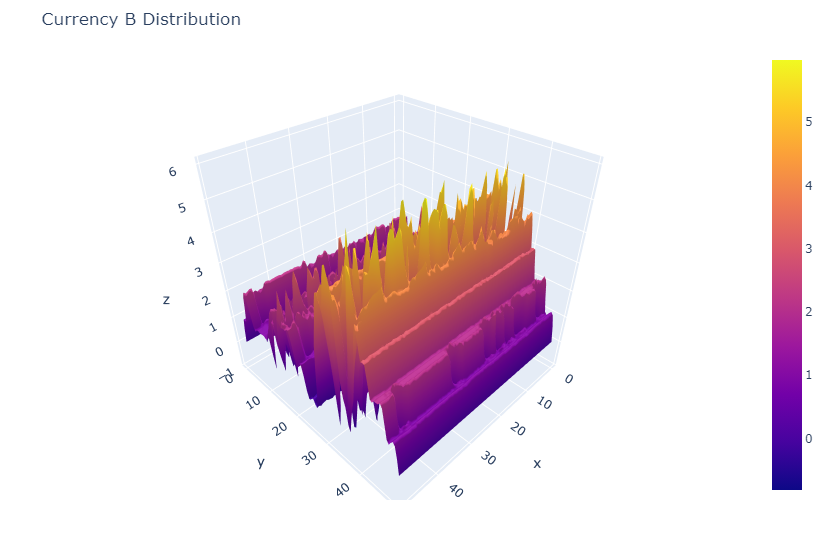

In [14]:
x = currencyB_3d[:,0]
y = currencyB_3d[:,1]
z = currencyB_3d[:,2]
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)

X,Y = np.meshgrid(xi,yi)

Z = griddata((x,y),z,(X,Y), method='cubic')

fig = go.Figure(go.Surface(x=xi,y=yi,z=Z))

fig.update_layout(title='Currency B Distribution', autosize=False,
                  width=500, height=550,
                  margin=dict(l=50, r=50, b=50, t=50))

fig.show()